In [20]:
# warning 무시
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pylab as plt
from matplotlib import font_manager
import matplotlib.font_manager as fm
# '-' 깨짐 해결 모듈
import matplotlib as mpl

plt.rcParams["font.family"] = "Malgun Gothic"  # For Windows
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (8,4)
print(plt.rcParams["font.family"])

# 마이너스 깨짐 해결
mpl.rcParams["axes.unicode_minus"] = False

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.tree import plot_tree
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from bs4 import BeautifulSoup
from xgboost import XGBRegressor
from sklearn.metrics import r2_score

from konlpy.tag import Okt
from collections import Counter
from konlpy.tag import Komoran
from nltk.tokenize import word_tokenize
from nltk import FreqDist
from nltk.corpus import stopwords
from wordcloud import WordCloud



import numpy as np
import pandas as pd
import pandas as pd
import requests
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

['Malgun Gothic']


In [5]:
test = pd.read_csv('Project_data/data/전처리데이터/bloter_portal_platform_전처리끝.csv')

In [6]:
test['news_date'].value_counts().sort_index()

news_date
2022.05.02 09:40    1
2022.05.03 17:56    1
2022.05.04 13:08    1
2022.05.04 13:50    1
2022.05.23 17:55    1
                   ..
2023.05.22 16:18    1
2023.05.23 18:25    1
2023.05.24 18:27    1
2023.05.25 19:02    1
2023.05.31 17:48    1
Name: count, Length: 99, dtype: int64

In [7]:
# 새로운 CSV 파일 경로 및 이름
test_file = 'Project_data/data/전처리데이터/bloter_portal_platform_전처리끝.csv'

# 데이터프레임을 새로운 CSV 파일로 저장
test.to_csv(test_file, index=False)

In [9]:
test_df = pd.read_table('Project_data/data/전처리데이터/bloter_portal_platform_전처리끝.csv', sep=',')
test_df

,news_date,news_title,news_text_sm,url_in,news_writer,tags_string,news_thumbnail
0,2022.05.02 09:40,"넷플릭스, 해리왕자 부인 마클 애니 제작 취소...비용 절감?",세계 최대 온라인동영상서비스(OTT) 넷플릭스가 영국 해리 왕자의 부인 메건 마클과...,https://www.bloter.net/news/articleView.html?i...,최경미,"#넷플릭스,#OTT,#메건 마클,#해리 왕자,#펄",https://cdn.bloter.net/news/thumbnail/202205/4...
1,2022.05.03 17:56,'캠핑' 검색하면 '차박·카라반' 보여준다…네이버가 통합검색→스마트블록으로 가는 이유,네이버가 통합검색으로 대표되는 자사의 검색 결과를 인공지능(AI)이 적용된 '스마트...,https://www.bloter.net/news/articleView.html?i...,박현준,"#네이버,#통합검색,#인공지능",https://cdn.bloter.net/news/thumbnail/202205/4...
2,2022.05.04 13:08,"네이버, 7월부터 '재택·출근' 선택한다",네이버가 오는 7월부터 재택근무와 사무실 출근 중 원하는 형태를 선택하는 근무제 '...,https://www.bloter.net/news/articleView.html?i...,박현준,"#네이버,#최수연,#카카오",https://cdn.bloter.net/news/thumbnail/202205/4...
3,2022.05.04 13:50,"스포티파이, 로블록스 내 '케이팝 테마공원' 조성",세계 최대 음원 스트리밍 플랫폼 스포티파이가 메타버스 플랫폼 '로블록스'에 '스포티...,https://www.bloter.net/news/articleView.html?i...,최경미,"#스포티파이,#스포티파이 아일랜드,#로블록스,#메타버스,#선미,#스트레이 키즈",https://cdn.bloter.net/news/thumbnail/202205/4...
4,2022.05.23 17:55,네이버 아닌 언론사 홈페이지서 뉴스를 본다면 독자는 좋을까,"""언론사의 홈페이지는 광고로 뒤덮혀 기사를 읽기가 너무 힘들어요.네이버에서 뉴스를 ...",https://www.bloter.net/news/articleView.html?i...,박현준,"#네이버,#포털,#아웃링크",https://cdn.bloter.net/news/thumbnail/202205/4...
...,...,...,...,...,...,...,...
94,2023.05.22 16:18,"네이버·카카오, '뉴스제평위' 잠정 중단…새 제휴 모델 찾는다",네이버·카카오가 언론사의 뉴스 제휴 평가 시스템 개선 방안을 모색하기 위해 '뉴스제...,https://www.bloter.net/news/articleView.html?i...,정병연 기자,"#네이버,#카카오,#뉴스,#뉴스제휴평가위원회",https://cdn.bloter.net/news/thumbnail/202305/6...
95,2023.05.23 18:25,"네이버·카카오 '뉴스제평위 중단'에 뿔난 인터넷신문…""심사 재개 일정 공개하라""",네이버와 카카오가 최근 뉴스제휴 심사를 무기한 중단한 가운데 인터넷신문들이 뉴스제휴...,https://www.bloter.net/news/articleView.html?i...,박현준 기자,"#네이버,#카카오,#뉴스제휴평가위원회",https://cdn.bloter.net/news/thumbnail/202305/6...
96,2023.05.24 18:27,지그재그도 앱 밖으로 나왔다…팝업 스토어 운영 차별점은?,카카오스타일의 스타일 커머스 플랫폼 지그재그가 애플리케이션에서 나와 더현대 서울에 ...,https://www.bloter.net/news/articleView.html?i...,안신혜 기자,"#패션플랫폼,#커머스,#지그재그,#카카오스타일,#더현대서울,#팝업스토어",https://cdn.bloter.net/news/thumbnail/202305/6...
97,2023.05.25 19:02,"지그재그 팝업 스토어, '백문이 불여일견' [현장+]",기자는 끊을 수 없을 만큼 인터넷 쇼핑에 길들여졌다. 하지만 취재나 여가를 즐기며 ...,https://www.bloter.net/news/articleView.html?i...,안신혜 기자,"#카카오스타일,#지그재그,#온라인플랫폼,#패션플랫폼,#더현대서울,#팝업스토어",https://cdn.bloter.net/news/thumbnail/202305/6...


In [10]:
okt = Okt()

In [12]:
data = pd.read_csv('Project_data/data/전처리데이터/bloter_portal_platform_전처리끝.csv', encoding='UTF-8')
data = data['news_title'][:15]
data = data.to_list()
data = ' ' .join(data)

In [13]:
noun_data = okt.nouns(data)

In [14]:
count_noun_data = Counter(noun_data)
filtered_count_noun_data = {word: count for word, count in count_noun_data.items() if count >= 2}

In [18]:
# 데이터프레임에서 '제목' 열의 모든 텍스트를 하나의 문자열로 결합
text = ' '.join(test_df['news_title'])

# Komoran 형태소 분석기 초기화
komoran = Komoran()

# 텍스트 토큰화 및 형태소 분석
tokens = word_tokenize(text)
pos_tags = komoran.pos(text)

# 불용어 파일 읽기
stop_words = []
with open('Project_data/data/불용.txt', 'r', encoding='utf-8') as file:
    stop_words = file.read().splitlines()

# 단어 등장 횟수를 저장할 딕셔너리 초기화
word_counts = {}

# 데이터프레임을 순회하며 날짜별로 단어 등장 횟수 집계
for text, date in zip(test_df['news_title'], test_df['news_date']):
    # 텍스트 토큰화 및 형태소 분석
    tokens = word_tokenize(text)
    pos_tags = komoran.pos(text)
    
    # 년도, 월, 일 추출
    year, month, day = date[:-1].split('.')
    
    # 날짜를 합친 형식으로 표시
    full_date = f"{year}-{month}-{day}"
    
    # 불용어 제거 및 명사 추출
    filtered_tokens = [token for token in tokens if token not in stop_words]
    nouns = [token for token, pos in pos_tags if pos.startswith('N')]
    
    # 하루에 하나의 태그만 추출
    if full_date in word_counts:
        continue
    else:
        word_counts[full_date] = nouns

# 가장 많이 언급된 단어 추출
top_words_limit = 1
top_words = []
for date, words in word_counts.items():
    word_count = {}
    for word in words:
        word_count[word] = word_count.get(word, 0) + 1
    
    sorted_words = sorted(word_count.items(), key=lambda x: x[1], reverse=True)
    
    # 상위 단어 추출
    if sorted_words:
        top_word = sorted_words[0][0]
        top_words.append((date, top_word))

# 추출된 단어를 데이터프레임으로 변환
result_df = pd.DataFrame(top_words, columns=['Date', 'Tag'])

# 데이터프레임을 CSV 파일로 저장
result_df.to_csv('추출된_태그1.csv', index=False)

print(result_df)

               Date     Tag
0   2022-05-02 09:4    넷플릭스
1   2022-05-03 17:5      검색
2   2022-05-04 13:0     네이버
3   2022-05-04 13:5   스포티파이
4   2022-05-23 17:5     네이버
..              ...     ...
93  2023-05-22 16:1     네이버
94  2023-05-23 18:2     네이버
95  2023-05-24 18:2    지그재그
96  2023-05-25 19:0    지그재그
97  2023-05-31 17:4  커넥티드카,

[98 rows x 2 columns]


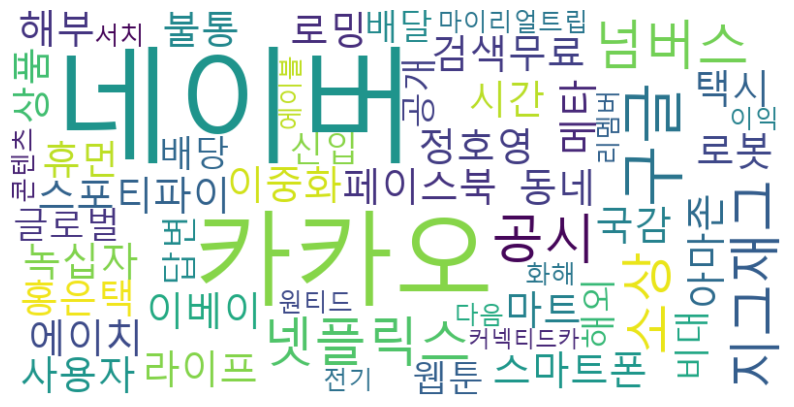

In [24]:
import re

# 폰트 설정
# font_prop = font_manager.FontProperties(fname=font_path)
# plt.rcParams['font.family'] = font_prop.get_name()

# 폰트 사이즈 설정 (선택적)
plt.rcParams['font.size'] = 12

# CSV 파일 불러오기
dataframe = pd.read_csv('추출된_태그1.csv')

# 텍스트 데이터 추출 및 전처리
text_data = ' '.join(dataframe['Tag'])
# 정규표현식을 사용하여 2글자 이상의 단어만 추출
text_data = ' '.join(re.findall(r'\b\w{2,}\b', text_data))

# 워드클라우드 생성
wordcloud = WordCloud(width=800, height=400, font_path='Project_data/data/malgun.ttf',background_color='white').generate(text_data)

# 워드클라우드 시각화
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()